## MELBOURNE Housing Market




By: Usman Shaikh


Source: https://www.kaggle.com/anthonypino/melbourne-housing-market


Context:

The project explores various factors affecting home prices in the city of Melbourne, Australia.


Questions
1. Identify overall top and lowest ten suburbs for price of property in Melbourne.
2. Draw scatter plots for distance, landsize and year built vs. overall property prices.
3. Conduct detailed analysis for prices of homes, identify factors impacting them.
4. Identify top and lowest 10 suburbs specifically for single family homes in Melbourne.
5. Draw scatter plots for distance, landsize and year built vs. home prices.
6. Conduct T-Tests on categorical variables including distance, landsize and year built.
7. Determine which factors show a positive or negative on impact home prices in Melbourne.

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [14]:
housing_master = pd.read_csv("C:/Users/Instructor/Dropbox/Data Science/3.THINKFUL/Thinkful/P-R-O-J-E-C-T-S/Housing Project/Melbourne_housing_FULL.csv")

In [15]:
housing_master.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

### 1.1. Changing data types

In [16]:
# Changing data types
# If ‘coerce’, then invalid parsing will be set as NaN
housing_master['Price'] = pd.to_numeric(housing_master['Price'], errors='coerce')
housing_master['Distance'] = pd.to_numeric(housing_master['Distance'], errors='coerce')
housing_master['Postcode'] = pd.to_numeric(housing_master['Postcode'], errors='coerce')
housing_master['Bedroom2'] = pd.to_numeric(housing_master['Bedroom2'], errors='coerce')
housing_master['Bathroom'] = pd.to_numeric(housing_master['Bathroom'], errors='coerce')
housing_master['Car'] = pd.to_numeric(housing_master['Car'], errors='coerce')
housing_master['Landsize'] = pd.to_numeric(housing_master['Landsize'], errors='coerce')
housing_master['BuildingArea'] = pd.to_numeric(housing_master['BuildingArea'], errors='coerce')
housing_master['YearBuilt'] = pd.to_numeric(housing_master['YearBuilt'], errors='coerce')
housing_master['Lattitude'] = pd.to_numeric(housing_master['Lattitude'], errors='coerce')
housing_master['Longtitude'] = pd.to_numeric(housing_master['Longtitude'], errors='coerce')
housing_master['BuildingArea'] = pd.to_numeric(housing_master['BuildingArea'], errors='coerce')

In [10]:
housing_master.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

### 1.2. Dropping null values

In [6]:
housing_master = housing_master.dropna()

In [7]:
housing_master.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### 1.3. Dropping unnecessary columns

In [8]:
housing_master.drop(['SellerG','Lattitude', 'Longtitude'], axis=1, inplace=True)

In [9]:
housing_master.head(2)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0


### 1.4. Resetting, Renaming Index

In [10]:
# resetting index
housing_master.reset_index(drop = True, inplace = True)

In [11]:
# Naming the Index
housing_master.index.name = 'Index'

In [12]:
housing_master.head(2)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
Index,,,,,,,,,,,,,,,,,,
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0


### 1.5. Saving to 'CSV'

In [13]:
# Saving dataframe to csv
housing_master.to_csv('housing.csv')

## 2.0. AGGREGATIONS

In [14]:
# Grouped by suburb for average Price, Distance and Landsize.
housing_updated = housing_master.groupby(['Suburb']).mean()[['Price', 'Distance', 'Landsize']].reset_index()

In [15]:
housing_updated.head()

,Suburb,Price,Distance,Landsize
0,Abbotsford,1.126410e+06,2.628205,227.128205
1,Aberfeldie,1.462966e+06,8.548276,540.275862
2,Airport West,7.668077e+05,12.069231,424.384615
3,Albanvale,5.403333e+05,14.000000,552.000000
4,Albert Park,1.950985e+06,3.238235,152.941176


### 2.1.Top Ten suburbs with the highest average price

In [16]:
Top_ten_Suburbs_Price = housing_master.groupby(['Suburb']).mean()[['Price']].nlargest(10, 'Price').reset_index()
Top_ten_Suburbs_Price.head()

,Suburb,Price
0,Kooyong,3.080000e+06
1,Middle Park,2.665115e+06
2,Canterbury,2.467463e+06
3,Deepdene,2.380000e+06
4,Malvern,2.272595e+06


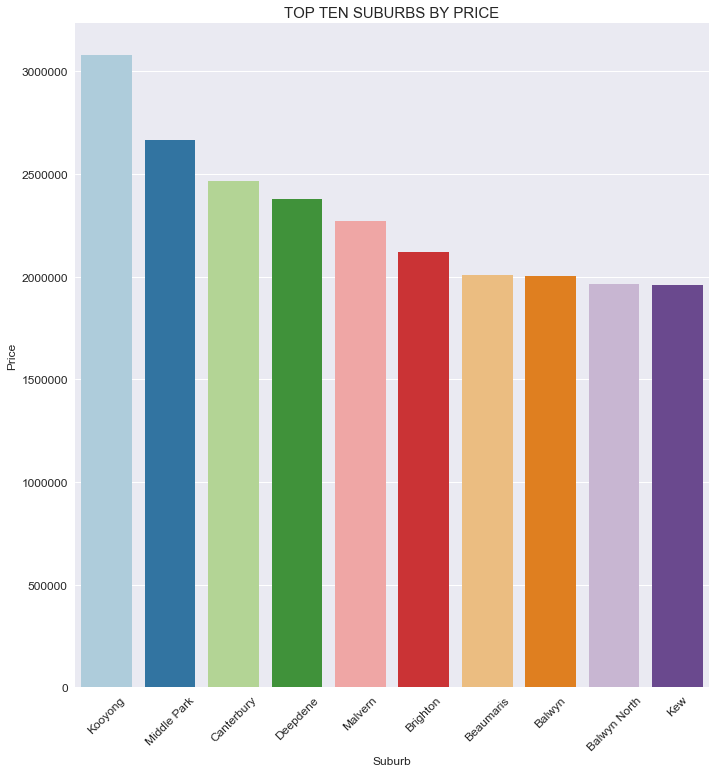

In [17]:
sns.set(style="darkgrid")

g = sns.factorplot(x="Suburb", y="Price", data=Top_ten_Suburbs_Price,
                   size=10, kind="bar", palette="Paired", ci=95, legend=False)
g.set_xlabels(fontsize=12)
g.set_ylabels(fontsize=12)
g.set_xticklabels(rotation=45, fontsize=12)
g.set_yticklabels(fontsize=12)
plt.title('TOP TEN SUBURBS BY PRICE',fontsize=15)
plt.show()

### 2.2. Top Ten suburbs with the lowest average distance from CBD

In [18]:
Top_ten_Suburbs_with_lowest_distance_CBD = housing_master.groupby(['Suburb']).mean()[['Distance']].nsmallest(10, 'Distance').reset_index()
Top_ten_Suburbs_with_lowest_distance_CBD.head()

,Suburb,Distance
0,Southbank,1.131818
1,East Melbourne,1.385714
2,Collingwood,1.714286
3,Carlton,1.754545
4,Fitzroy,1.785714


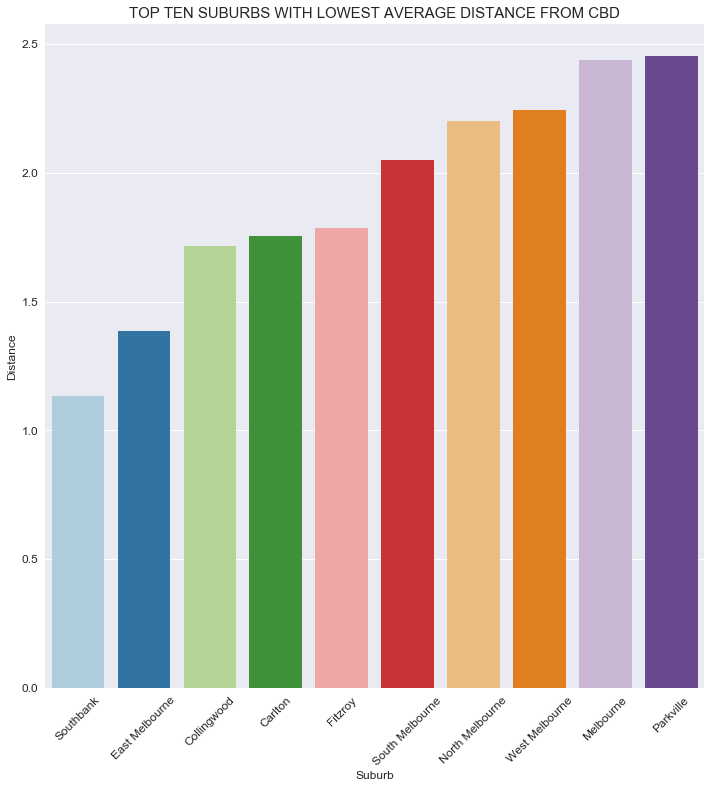

In [19]:
sns.set(style="darkgrid")

g = sns.factorplot(x="Suburb", y="Distance", data=Top_ten_Suburbs_with_lowest_distance_CBD,
                   size=10, kind="bar", palette="Paired", ci=95, legend=False)
g.set_xlabels(fontsize=12)
g.set_ylabels(fontsize=12)
g.set_xticklabels(rotation=45, fontsize=12)
g.set_yticklabels(fontsize=12)
plt.title('TOP TEN SUBURBS WITH LOWEST AVERAGE DISTANCE FROM CBD',fontsize=15)
plt.show()

### 2.3. SCATTER PLOT PRICE Vs. DISTANCE

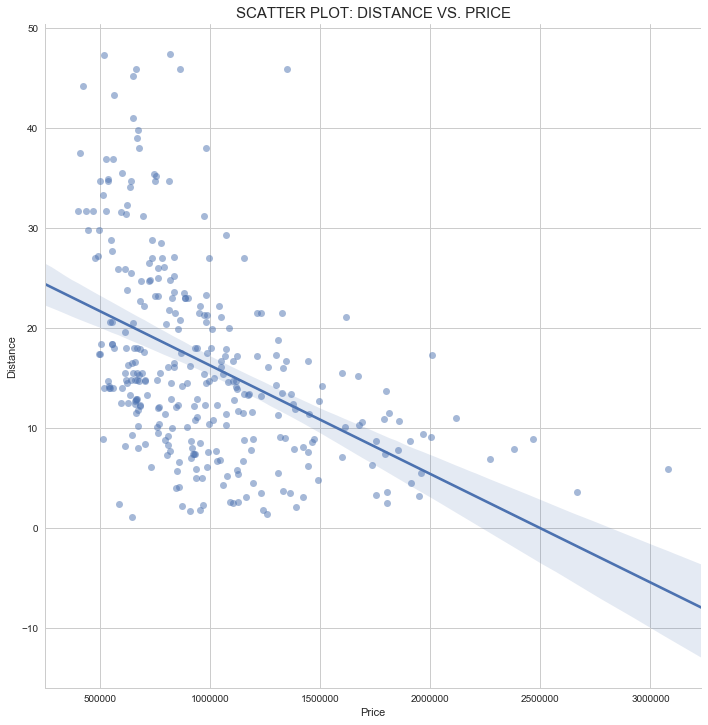

In [20]:
sns.set(style="whitegrid")
sns.lmplot(y='Distance', # Variable 1.
               x='Price', # Variable 2.
               data=housing_updated, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':.5},
               size =10) # Set points to semi-transparent to see overlaping points.

plt.title('SCATTER PLOT: DISTANCE VS. PRICE', fontsize=15)
plt.show()

### 2.4. Top Ten suburbs with the largest average Landsize

In [21]:
top_ten_suburbs_by_landsize = housing_master.groupby(['Suburb']).mean()[['Price','Distance','Landsize']].nlargest(10, 'Landsize').reset_index()
top_ten_suburbs_by_landsize.head()

,Suburb,Price,Distance,Landsize
0,Bullengarook,865000.0,45.9,42800.00
1,Gisborne South,1350000.0,45.9,40469.00
2,Gisborne,664625.0,45.9,5882.00
3,Mickleham,982500.0,20.6,5551.00
4,Langwarrin,653000.0,41.0,2969.75


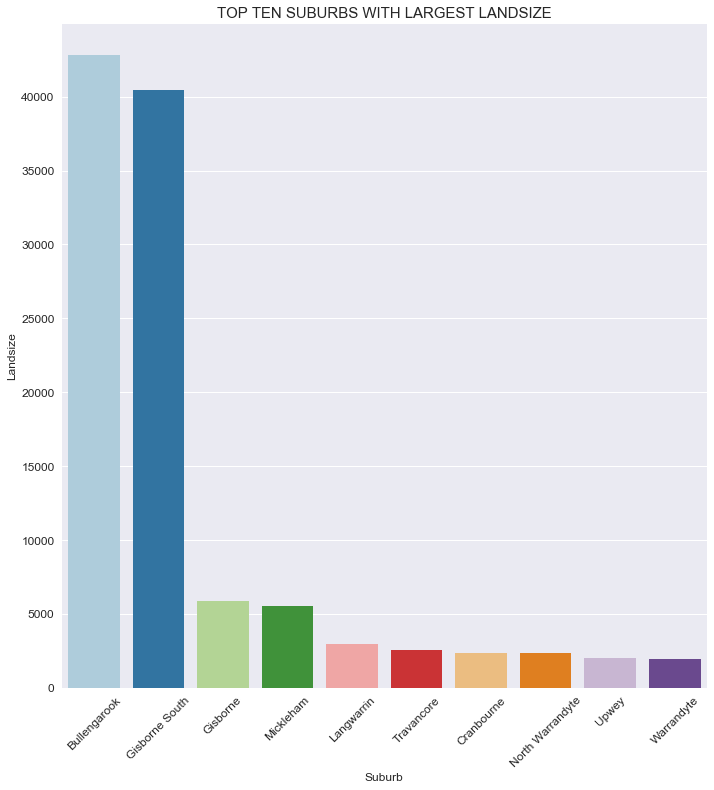

In [22]:
sns.set(style="darkgrid")

g = sns.factorplot(x="Suburb", y="Landsize", data=top_ten_suburbs_by_landsize,
                   size=10, kind="bar", palette="Paired", ci=95, legend=False)
g.set_xlabels(fontsize=12)
g.set_ylabels(fontsize=12)
g.set_xticklabels(rotation=45, fontsize=12)
g.set_yticklabels(fontsize=12)
plt.title('TOP TEN SUBURBS WITH LARGEST LANDSIZE',fontsize=15)
plt.show()

### 2.5. SCATTER PLOT LANDSIZE VS. PRICE

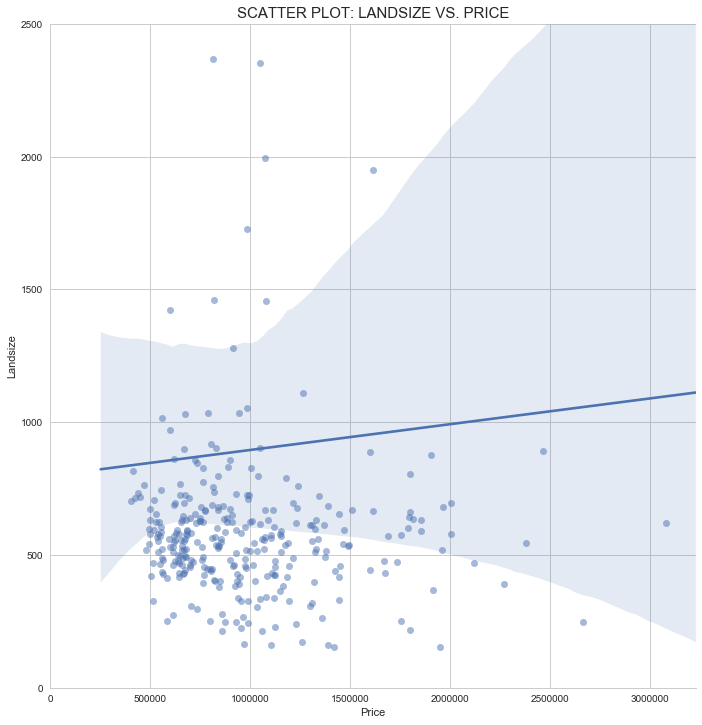

In [23]:
sns.set(style="whitegrid")
sns.lmplot(y='Landsize', # Variable 1.
               x='Price', # Variable 2.
               data=housing_updated, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':.5},
               size =10) # Set points to semi-transparent to see overlaping points.
plt.ylim(0, 2500 )
plt.xlim(0, None )
plt.title('SCATTER PLOT: LANDSIZE VS. PRICE', fontsize=15)
plt.show()

Business problem is that the price of the house is dependent upon the three choosen attributes.

# 3.0. HOMES 

In [24]:
# Grouped by Suburb and Type
housing_by_suburb_and_type = housing_master.groupby(['Suburb', 'Type']).mean()[['Price', 'Distance', 'Landsize', 'YearBuilt']].reset_index()

In [25]:
housing_by_suburb_and_type.head()

,Suburb,Type,Price,Distance,Landsize,YearBuilt
0,Abbotsford,h,1.237656e+06,2.609375,183.687500,1934.781250
1,Abbotsford,u,6.178571e+05,2.714286,425.714286,1994.000000
2,Aberfeldie,h,1.679909e+06,8.518182,610.409091,1969.500000
3,Aberfeldie,t,1.128333e+06,8.566667,344.666667,2011.333333
4,Aberfeldie,u,5.207500e+05,8.700000,301.250000,1986.500000


In [26]:
# Homes only
homes = housing_by_suburb_and_type[(housing_by_suburb_and_type['Type'] == 'h')].reset_index()

In [27]:
homes.head()

,index,Suburb,Type,Price,Distance,Landsize,YearBuilt
0,0,Abbotsford,h,1.237656e+06,2.609375,183.687500,1934.781250
1,2,Aberfeldie,h,1.679909e+06,8.518182,610.409091,1969.500000
2,5,Airport West,h,8.087500e+05,11.863889,520.972222,1974.750000
3,8,Albanvale,h,5.403333e+05,14.000000,552.000000,1979.333333
4,9,Albert Park,h,2.067935e+06,3.241935,157.290323,1904.580645


### Top 10 Average Home Prices

In [28]:
Top_ten_suburbs_price = homes.groupby(['Suburb']).mean()[['Price']].nlargest(10, 'Price').reset_index()
Top_ten_suburbs_price

,Suburb,Price
0,Toorak,3.404933e+06
1,Deepdene,3.080000e+06
2,Kooyong,3.080000e+06
3,Middle Park,2.835750e+06
4,Canterbury,2.756674e+06
5,Malvern,2.713857e+06
6,Armadale,2.593365e+06
7,Brighton,2.494983e+06
8,Balwyn,2.452592e+06
9,Kew,2.428507e+06


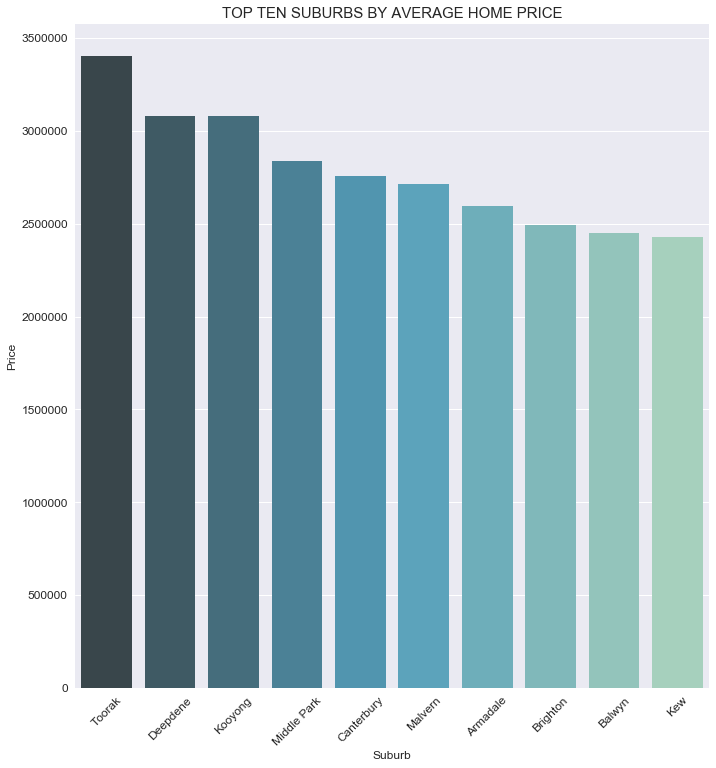

In [29]:
sns.set(style="darkgrid")

g = sns.factorplot(x="Suburb", y="Price", data=Top_ten_suburbs_price,
                   size=10, kind="bar", palette="GnBu_d", ci=95, legend=False)
g.set_xlabels(fontsize=12)
g.set_ylabels(fontsize=12)
g.set_xticklabels(rotation=45, fontsize=12)
g.set_yticklabels(fontsize=12)
plt.title('TOP TEN SUBURBS BY AVERAGE HOME PRICE',fontsize=15)
plt.show()

### Lowest 10 Average Home Price

In [30]:
lowest_ten_suburbs_price = homes.groupby(['Suburb']).mean()[['Price']].nsmallest(10, 'Price').reset_index()
lowest_ten_suburbs_price

,Suburb,Price
0,Caulfield,131000.000000
1,Kurunjang,403000.000000
2,Bacchus Marsh,412000.000000
3,Wallan,422750.000000
4,Melton,438843.750000
5,Melton South,447583.333333
6,Melton West,469115.384615
7,The Basin,477000.000000
8,Wyndham Vale,493666.666667
9,Coolaroo,494666.666667


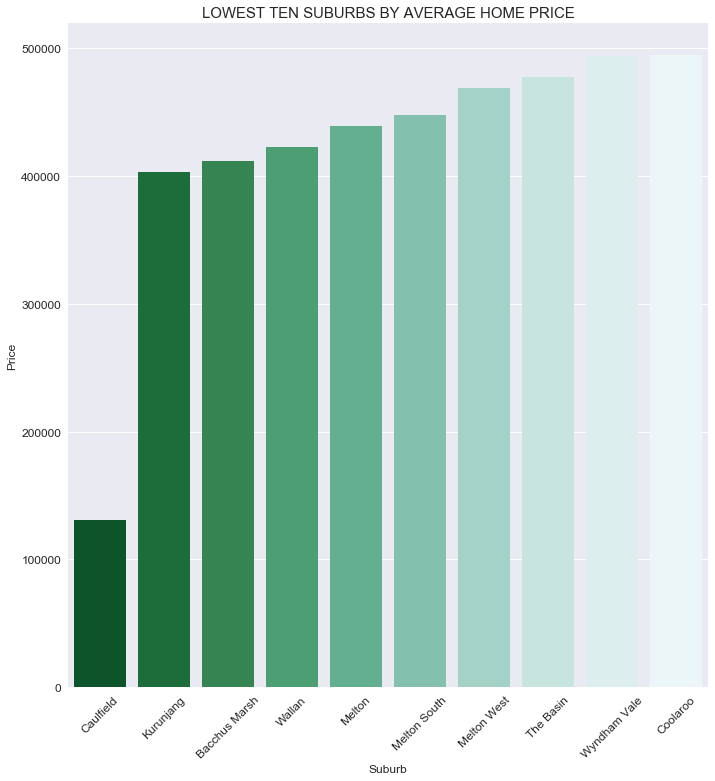

In [31]:
sns.set(style="darkgrid")

g = sns.factorplot(x="Suburb", y="Price", data=lowest_ten_suburbs_price,
                   size=10, kind="bar", palette="BuGn_r", ci=95, legend=False)
g.set_xlabels(fontsize=12)
g.set_ylabels(fontsize=12)
g.set_xticklabels(rotation=45, fontsize=12)
g.set_yticklabels(fontsize=12)
plt.title('LOWEST TEN SUBURBS BY AVERAGE HOME PRICE',fontsize=15)
plt.show()

### SCATTER PLOT: DISTANCE VS. HOME PRICES

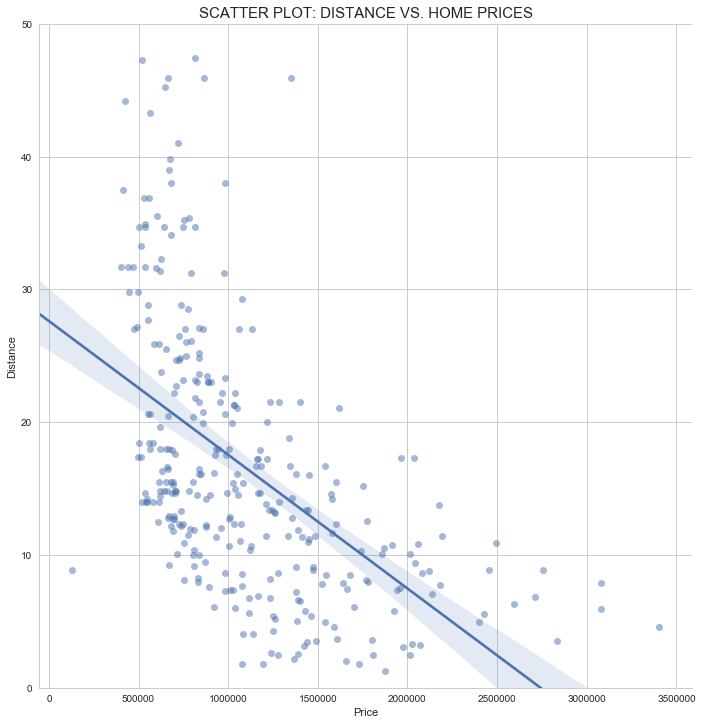

In [32]:
sns.set(style="whitegrid")
sns.lmplot(y='Distance', # Variable 1.
               x='Price', # Variable 2.
               data=homes, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':.5},
               size =10) # Set points to semi-transparent to see overlaping points.
plt.ylim(0, 50)
plt.title('SCATTER PLOT: DISTANCE VS. HOME PRICES', fontsize=15)
plt.show()

### SCATTER PLOT: LANDSIZE VS. HOME PRICES

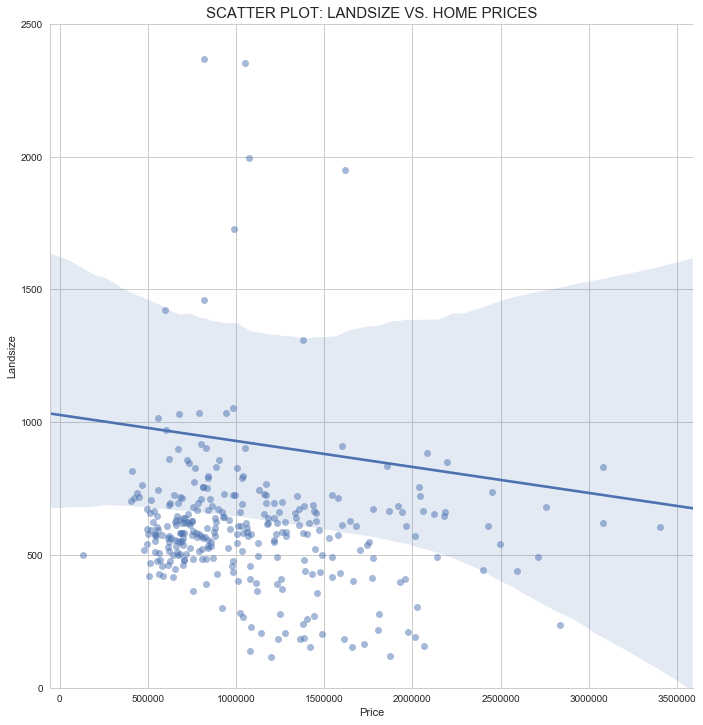

In [33]:
sns.set(style="whitegrid")
sns.lmplot(y='Landsize', # Variable 1.
               x='Price', # Variable 2.
               data=homes, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':.5},
               size =10) # Set points to semi-transparent to see overlaping points.
plt.ylim(0, 2500)
plt.title('SCATTER PLOT: LANDSIZE VS. HOME PRICES', fontsize=15)
plt.show()

### SCATTER PLOT: YEARBUILT VS. HOME PRICES

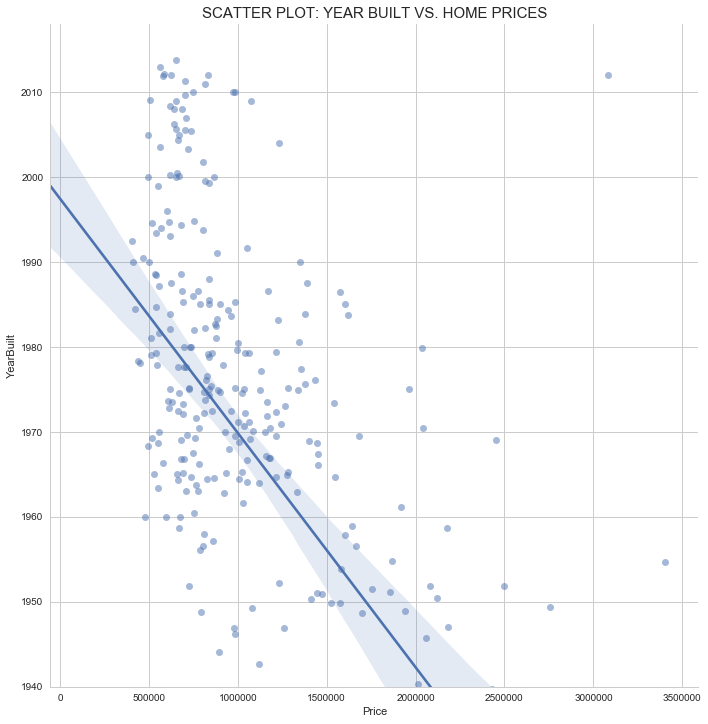

In [34]:
sns.set(style="whitegrid")
sns.lmplot(y='YearBuilt', # Variable 1.
               x='Price', # Variable 2.
               data=homes, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':.5},
               size =10) # Set points to semi-transparent to see overlaping points.
plt.ylim(1940, 2018)
plt.title('SCATTER PLOT: YEAR BUILT VS. HOME PRICES', fontsize=15)
plt.show()

### ADDING CATEGORICAL VARIABLES for Distance, Landsize, YearBuilt

In [35]:
# added new column 'Distance_category' with condition.
homes['Distance_category'] = homes.Distance.apply(lambda x: 'long' if x > 20 else 'short')

In [36]:
#  added new column 'Landsize_category' with condition.
homes['Landsize_category'] = homes.Landsize.apply(lambda x:'large' if x > 700 else 'small')

In [37]:
# added new column 'year_category' with condition.
homes['year_category'] = homes.YearBuilt.apply(lambda x: 'old' if x < 2000 else 'new')

In [38]:
homes.head()

,index,Suburb,Type,Price,Distance,Landsize,YearBuilt,Distance_category,Landsize_category,year_category
0,0,Abbotsford,h,1.237656e+06,2.609375,183.687500,1934.781250,short,small,old
1,2,Aberfeldie,h,1.679909e+06,8.518182,610.409091,1969.500000,short,small,old
2,5,Airport West,h,8.087500e+05,11.863889,520.972222,1974.750000,short,small,old
3,8,Albanvale,h,5.403333e+05,14.000000,552.000000,1979.333333,short,small,old
4,9,Albert Park,h,2.067935e+06,3.241935,157.290323,1904.580645,short,small,old


In [39]:
homes.shape

(313, 10)

## 3.1. Histograms for Home (Price, Distance, Landsize and YearBuilt)

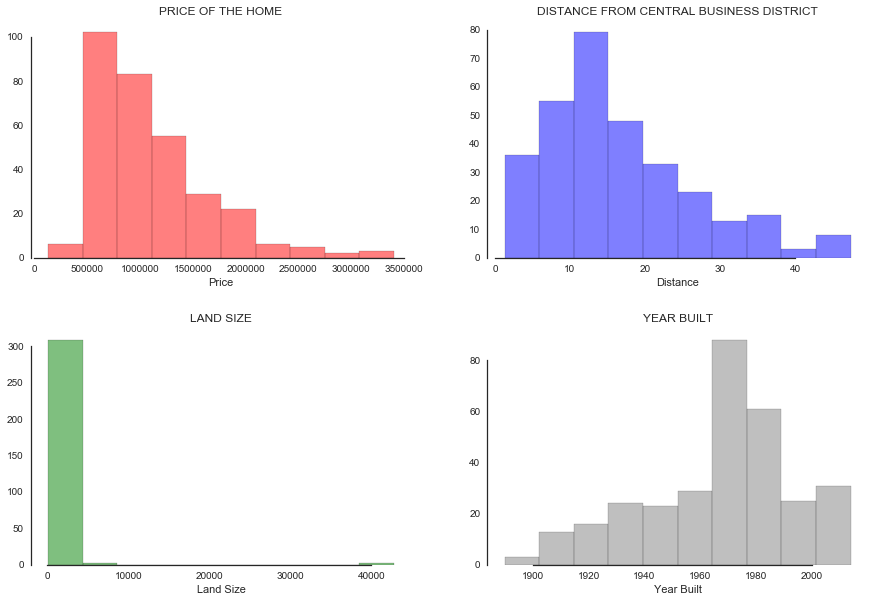

In [40]:
# style options = white,whitegrid,ticks,darkgrid
# other options include = bins=12, normed=True, histtype='step', linewidth=2

sns.set(style="white")

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(homes['Price'], color='red', alpha=.5, edgecolor = 'black')
plt.xlabel('Price')
plt.title('PRICE OF THE HOME')

plt.subplot(2,2,2)
plt.hist(homes['Distance'], color='blue', alpha=.5, edgecolor = 'black')
plt.xlabel('Distance')
plt.title('DISTANCE FROM CENTRAL BUSINESS DISTRICT')

plt.subplot(2,2,3)
plt.hist(homes['Landsize'], color='green', alpha=.5, edgecolor = 'black')
plt.xlabel('Land Size')
plt.title('LAND SIZE')


plt.subplot(2,2,4)
plt.hist(homes['YearBuilt'], color='gray', alpha=.5, edgecolor = 'black')
plt.xlabel('Year Built')
plt.title('YEAR BUILT')

plt.subplots_adjust(hspace = .3)

# Removing excess lines around the plot.
sns.despine(trim=True)


plt.show()

## 3.2. Histograms (Home Price) when Distance 'short' or 'long'

In [41]:
Distance_short = homes[(homes['Distance_category'] == 'short')]
Distance_long = homes[(homes['Distance_category'] == 'long')]

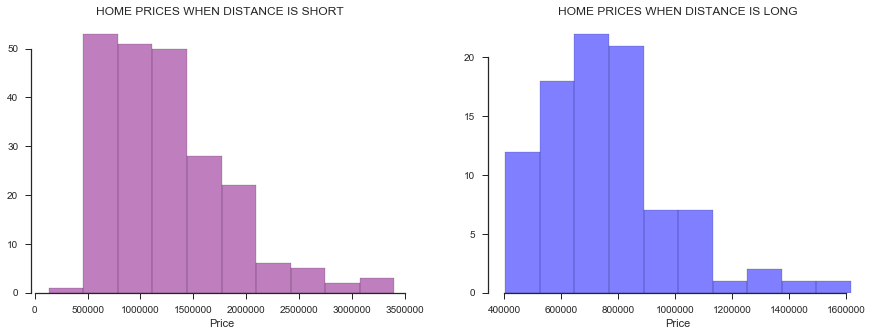

In [42]:
sns.set(style="ticks")

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(Distance_short['Price'], color='purple', alpha=.5, edgecolor = 'black', bins=10)
plt.xlabel('Price')
plt.title('HOME PRICES WHEN DISTANCE IS SHORT ')

plt.subplot(1,2,2)
plt.hist(Distance_long['Price'], color='blue', alpha=.5, edgecolor = 'black', bins=10)
plt.xlabel('Price')
plt.title('HOME PRICES WHEN DISTANCE IS LONG')

# Removing excess lines around the plot.
sns.despine(trim=True)

plt.show()

## T test (Home Price)  when Distance  'short' vs 'long'

In [43]:
print(Distance_short['Price'].mean())
print(Distance_long['Price'].mean())

1239895.5464369345
762265.8448944481


In [44]:
from scipy.stats import ttest_ind

In [45]:
print(ttest_ind(Distance_short['Price'], Distance_long['Price'], equal_var = False))

Ttest_indResult(statistic=10.645729600403333, pvalue=9.014371624935617e-23)


## 3.3. Histograms (Home Price) when Landsize is 'small' or 'large'

In [46]:
landsize_small = homes[(homes['Landsize_category'] == 'small')]
landsize_large = homes[(homes['Landsize_category'] == 'large')]

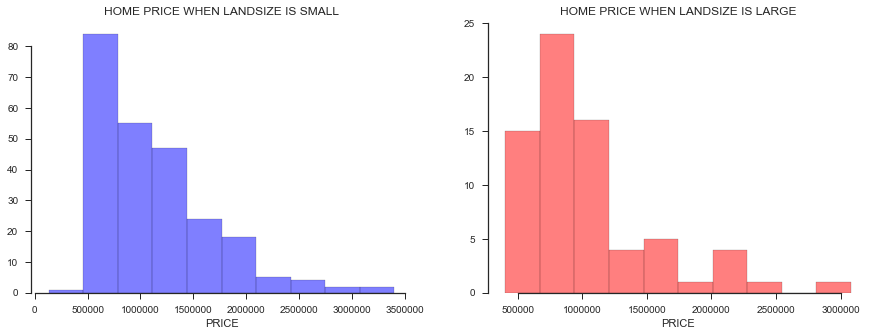

In [47]:
sns.set(style="ticks")

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(landsize_small['Price'], color='blue', alpha=.5, edgecolor = 'black', bins=10)
plt.xlabel('PRICE')
plt.title('HOME PRICE WHEN LANDSIZE IS SMALL')

plt.subplot(1,2,2)
plt.hist(landsize_large['Price'], color='red', edgecolor = 'black', alpha=.5, bins=10)
plt.xlabel('PRICE')
plt.title('HOME PRICE WHEN LANDSIZE IS LARGE')

# Removing excess lines around the plot.
sns.despine(trim=True)

plt.show()

## T test (Home Price) when landsize, small vs. large

In [48]:
landsize_small = homes[(homes['Landsize_category'] == 'small')]
landsize_large = homes[(homes['Landsize_category'] == 'large')]

In [49]:
print(landsize_small['Price'].mean())
print(landsize_large['Price'].mean())

1120655.6613549837
1027418.358379517


In [50]:
from scipy.stats import ttest_ind

In [51]:
print(ttest_ind(landsize_small['Price'], landsize_large['Price'], equal_var = False))

Ttest_indResult(statistic=1.3255030119109872, pvalue=0.18754441213229775)


## 3.4. Histograms (Home Price) when YearBuilt is 'new' or 'old'

In [52]:
yearbuilt_old = homes[(homes['year_category'] == 'old')]
yearbuilt_new = homes[(homes['year_category'] == 'new')]

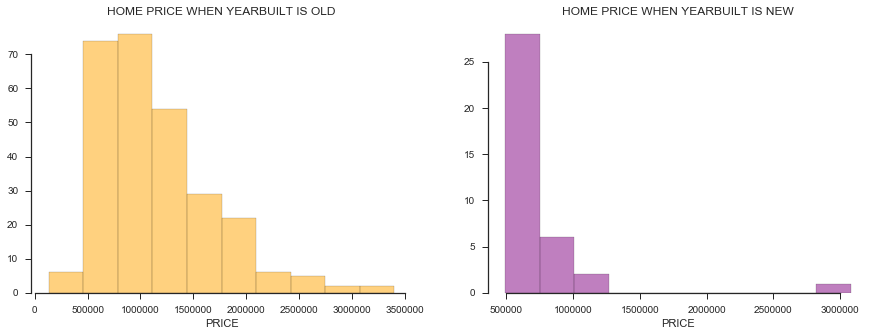

In [53]:
sns.set(style="ticks")

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(yearbuilt_old['Price'], color='orange', alpha=.5, edgecolor = 'black', bins=10)
plt.xlabel('PRICE')
plt.title('HOME PRICE WHEN YEARBUILT IS OLD')

plt.subplot(1,2,2)
plt.hist(yearbuilt_new['Price'], color='purple', edgecolor = 'black', alpha=.5, bins=10)
plt.xlabel('PRICE')
plt.title('HOME PRICE WHEN YEARBUILT IS NEW')

# Removing excess lines around the plot.
sns.despine(trim=True)

plt.show()

## T test (Home Price) when YearBuilt, old vs. new

In [54]:
print(yearbuilt_old['Price'].mean())
print(yearbuilt_new['Price'].mean())

1143353.8664394424
772424.496096367


In [55]:
from scipy.stats import ttest_ind

In [56]:
print(ttest_ind(yearbuilt_old['Price'], yearbuilt_new['Price'], equal_var = False))

Ttest_indResult(statistic=4.869090730394132, pvalue=1.0494727967515373e-05)
